In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [4]:
baseball_df = pd.read_csv('baseball.csv')
baseball_df.head()

,Player,MLE,TRUTH
0,1,0.345,0.298
1,2,0.333,0.346
2,3,0.322,0.222
3,4,0.311,0.276
4,5,0.289,0.263


In [43]:
# Using arcsin transformation...
n = 90
baseball_df['pi_90'] = baseball_df['MLE']
# Transform to N(mu, 1) distr.
baseball_df['x_norm'] = np.round(2 * np.sqrt(n + 0.5) * \
                        np.arcsin(np.sqrt((n * baseball_df['pi_90'] + 0.375) / (n + 0.75))), 2)
x_bar = baseball_df['x_norm'].mean()
ssq_xi = np.sum((baseball_df['x_norm'] - x_bar) ** 2) 
B = 1 - ((18 - 3) / ssq_xi)
# Get mu_hat_JS
baseball_df['mu_hat_JS'] = x_bar + B * (baseball_df['x_norm'] - x_bar)
# Transform back to binomial data
baseball_df['p_hat_JS'] = np.round(1/n * ((np.sin(baseball_df['mu_hat_JS'] / (2 * np.sqrt(n + 0.5))) ** 2) * (n + 0.75) - 0.375),3)

In [44]:
baseball_df[['MLE', 'TRUTH', 'x_norm', 'mu_hat_JS', 'p_hat_JS']]

,MLE,TRUTH,x_norm,mu_hat_JS,p_hat_JS
0,0.345,0.298,11.97,10.712537,0.283
1,0.333,0.346,11.73,10.629675,0.279
2,0.322,0.222,11.51,10.553717,0.276
3,0.311,0.276,11.29,10.477760,0.272
4,0.289,0.263,10.84,10.322392,0.265
5,0.289,0.273,10.84,10.322392,0.265
6,0.278,0.303,10.61,10.242982,0.261
7,0.255,0.270,10.12,10.073805,0.253
8,0.244,0.230,9.88,9.990942,0.249
9,0.233,0.264,9.63,9.904627,0.245


In [45]:
# Now compute Sum of Squared Errors for both MLE and JS
(((baseball_df['MLE'] - baseball_df['TRUTH']) ** 2).sum(), 
((baseball_df['p_hat_JS'] - baseball_df['TRUTH']) ** 2).sum())

(0.04251199999999998, 0.021796999999999997)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


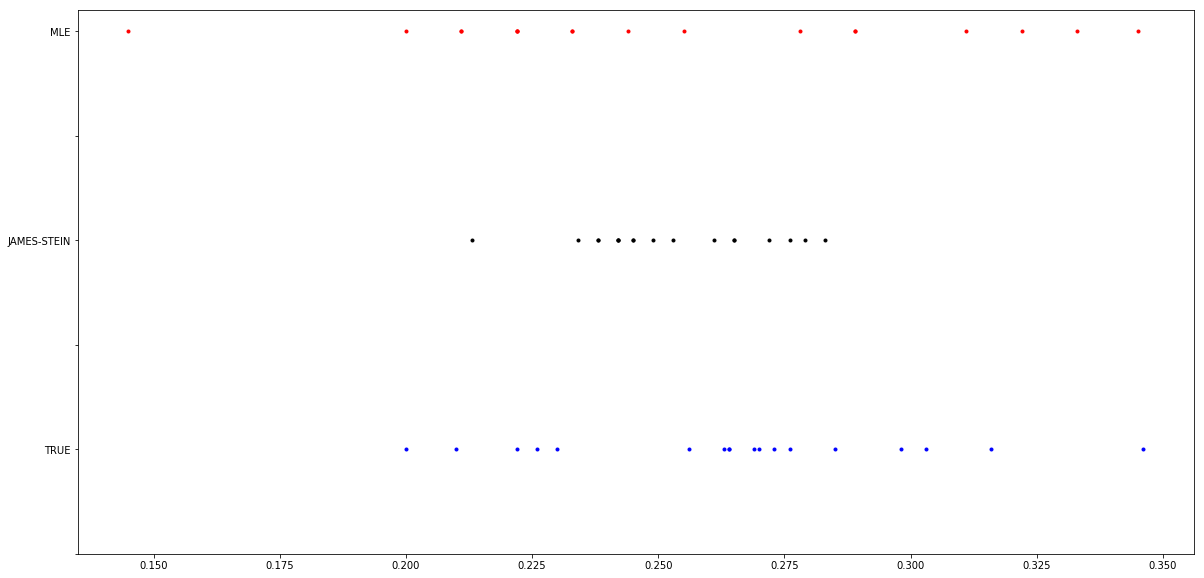

In [46]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(baseball_df['MLE'], np.repeat(5,baseball_df.shape[0]), '.r')
ax.plot(baseball_df['p_hat_JS'], np.repeat(3,baseball_df.shape[0]), '.k')
ax.plot(baseball_df['TRUTH'], np.repeat(1,baseball_df.shape[0]), '.b')
ax.set_yticks(np.arange(6))
ax.set_yticklabels(('','TRUE', '', 'JAMES-STEIN', '', 'MLE'))
fig.show()